# Trying to lead an observed life
#### [V. Hunter Adams](https://vanhunteradams.com/)

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

***

> - [Introduction](#Introduction)
> > - [I'm trying to resolve frustrations with my memory](#I'm-trying-to-resolve-frustrations-with-my-memory)
> > - [Identifying periodicities is helpful for remaining optimistic](#Identifying-periodicities-is-helpful-for-remaining-optimistic)
> > - [I'd like to have more good days](#I'd-like-to-have-more-good-days)
> - [2025 in review](#2025-in-review)
> > - [Timeline of daily scores](#Timeline-of-daily-scores)
> > - [Histogram of year's scores](#Histogram-of-year's-scores)
> > - [FFT of year's scores](#FFT-of-year's-scores)
> - [Some things I've learned for 2026](#Some-things-I've-learned-for-2026) 

In [1]:
import matplotlib.pyplot as plt
import numpy
from scipy.signal import savgol_filter
from IPython.display import HTML

***

# Introduction

I've been writing down the stuff that I do each day, and assigning each day a score in the range 1-10. This score attempts to quantify how "good" I felt as I prepared to go to sleep on that particular evening. A day that leaves me feeling totally happy and fulfilled receives a 10, a day that leaves me feeling the opposite receives a 1. I've been doing this for a few reasons.

### I'm trying to resolve frustrations with my memory

There are certain kinds of information for which my recall is fine, but there are other kinds of information for which my recall frustrates me. I'm pretty good at learning about stuff, and remembering the things that I've learned. Ask me about some detail of some project I'm working on, or that I've worked on in the past year or so, and I can pretty much bring that detail to mind. Obviously they fade with time, but my recall of this variety seems pretty normal compared to peers and colleagues. It doesn't frustrate me, though I'd love to improve it.

But ask me "what did you do this weekend" and I have to think really *really* hard to come up with an answer. What did I do last week? No idea. If someone reminds me of a certain event then it comes back, but without that reminder it's essentially gone. This is true even on days that break routine (e.g. a vacation or a work trip).

When it comes to the details of my daily life, each memory goes into an unlabeled and locked drawer. The keys to those drawers are held by the people with whom I share that memory. With some reminders from that person, I can unlock that drawer and access its contents. But since they aren't labeled, I can't ask for folks to jog my memory about events that I'd like to recall. If they don't bring it up unprompted, then I have no idea that there's even anything in that drawer.

And that bums me out! I know that I have memories with lost loved ones somewhere in my brain, but I can't access them. And now that I have a daughter, I don't want for my memories with her to disappear into some unlabeled drawer. I started writing things down so that I might have a book of keys. This has helped a lot!

### Identifying periodicities is helpful for remaining optimistic

I have an academic job, and so my years tend to by rather cyclic. If I feel like I'm in a rut, it's helpful to look at last year's data and realize "oh yes, this is just a tough time of year, but look it'll probably get better soon!" Furthermore, as a consquence of the memory frustrations I described above, I find it hard to remember the last time I was in a rut each time I enter a new one. I think that can sometimes make these ruts last a little longer than they otherwise would, because I also forget that they always pass, and I forget the things that I might have done to accelerate their passing.

### I'd like to have more good days

I'd like to calendar my time such that I have as many good days as possible. In order to do that, I need to which activities generate good days and which generate bad ones. I'll use this to inform how I calendar my days in 2026.

***

# 2025 in review

My mean score for 2025 was a 6.24, with a standard deviation of 1.35. Of course I have my own calibration for these scores that is difficult to communicate, but I'd classify a 6.24 as "pretty good!" It's interesting to see the year's highlights and lowlights emerge from the data, and it's interesting too to see that there are some parts of the year that *seem* to be a bit more trying than others. Lab 3 for the microcontrollers class is stressful!

The strongest periodicity in the data is weekly, which I suppose makes sense. There's some weak periodicity on a bi-monthly time interval, but in fact these scores aren't quite as cyclic as I would have guessed. I suppose that's good?

By comparing these scores against my journal entries, I've learned some things that I'll attempt to apply in 2026.

In [103]:
scores = numpy.array([7,6,5,5,7.5,
                      6,5,6.5,4,5.5,6.5,8,
                      5.5,6.5,8,7,9,8,8,
                      8.5,7,7,5,5,3,7,
                      6.5,6,6,6.5,6,2,3,
                      4,6,4,3,3,5,6,
                      4,4,3,3,5,7,7,
                      2,1,3,2,5,6,6,
                      5,6,5,6,6,7,7,
                      6,5,7,7,8,8,7,
                      7,6,7,5,6,6,5,
                      6,6,7,5,7,7,8,
                      8,5,7,7,7,6,6,
                      6,6,5,5,4,7,4,
                      8,6,7,5,7,6,8,
                      8,5,4,4,5,7,6,
                      7,6,7,7,7,7,8,
                      8,8,6,5,6,8,7,
                      4,9,10,9,7,6,8,
                      6,6,4,6,6,9,8,
                      7,6,7,5,6,7,7,
                      8,5,6,6,7,6,7,
                      8,6,3,6,7,7,7,
                      6,8,7,5,8,8,8,
                      9,8,7,7,8,7,7,
                      6,7,6,7,7,6,8,
                      7,7,6,7,5,6,6,
                      7,6,7,8,8,6,6,
                      6,7,5,6,7,7,6,
                      6,6,8,5,5,5,6,
                      6,6,5,6,5,6,7,
                      7,8,6,8,6,5,7,
                      8,5,5,6,6,6,7,
                      7,4,8,7,7,6,7,
                      7,7,6,4,5,5,8,
                      7,5,7,5,7,7,8,
                      8,6,6,6,5,6,7,
                      7,6,7,7,5,7,6,
                      6,5,7,5,5,5,6,
                      7,6,3,5,3,7,7,
                      8,4,5,4,5,5,6,
                      5,5,5,6,6,5,7,
                      6,6,6,7,6,6,7,
                      7,6,8,7,7,8,6,
                      7,7,6,5,6,7,7,
                      6,6,5,7,7,8,7,
                      8,5,6,6,5,7,6,
                      7,7,6,8,9,8,8,
                      6,7,8,7])

## Timeline of daily scores

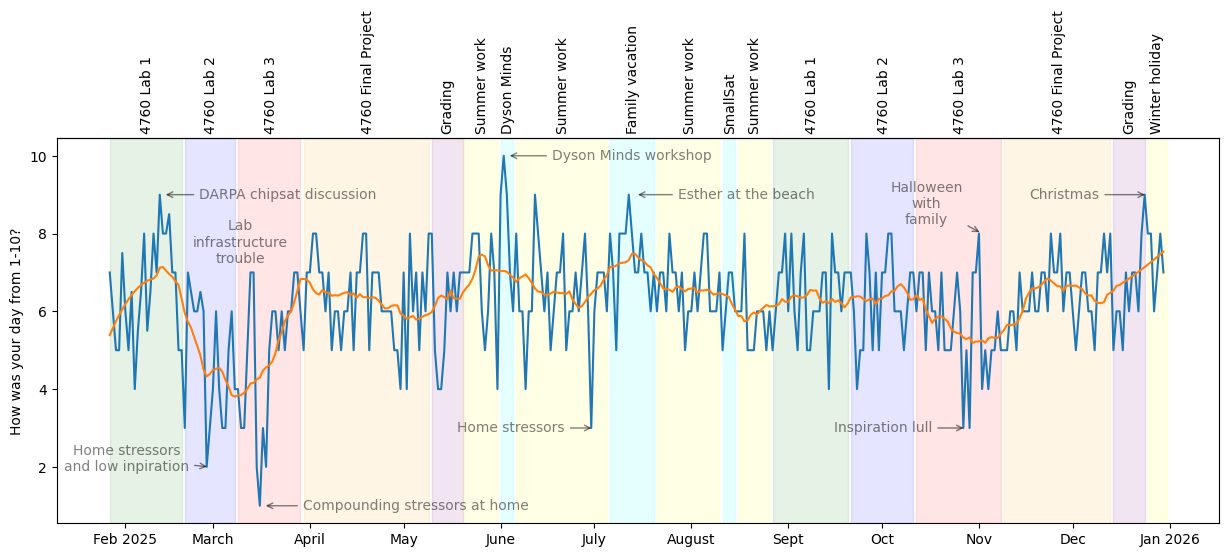

In [104]:
yhat = savgol_filter(scores, 30, 2) # window size 51, polynomial order 3
days = numpy.linspace(0, len(scores))
fig, ax = plt.subplots(figsize=(15, 5))

ax.set_xticks([5, 33, 64, 94, 125, 155, 186, 217, 247, 278, 308, 339],
           ['Feb 2025', 'March', 'April', 'May', 'June', 'July', 'August', 'Sept', 'Oct', 'Nov', 'Dec', 'Jan 2026'])
ax.set_ylabel('How was your day from 1-10?')

# label the classes:
sec = ax.secondary_xaxis(location=1)
sec.set_xticks([12, 32.5, 51.5, 82.5, 108, 119, 127.5, 145, 167.5, 185.5, 198.5, 206.5, 224.5, 247.5,
                272, 303.5, 326, 335],
               labels=['4760 Lab 1', '4760 Lab 2', '4760 Lab 3', '4760 Final Project', 'Grading',
                      'Summer work', 'Dyson Minds', 'Summer work', 'Family vacation',
                      'Summer work', 'SmallSat', 'Summer work', '4760 Lab 1',
                      '4760 Lab 2', '4760 Lab 3', '4760 Final Project', 'Grading',
                      'Winter holiday'], rotation='vertical')
sec.tick_params('x', length=0)

ax.annotate('Dyson Minds workshop',
            xy=(127, 10), xycoords='data',
            xytext=(90, -5), textcoords='offset points',
            arrowprops=dict(facecolor='black', arrowstyle="->", alpha=0.5),
            horizontalalignment='center', verticalalignment='bottom', alpha=0.5)

ax.annotate('Compounding stressors at home',
            xy=(49, 1), xycoords='data',
            xytext=(110, -5), textcoords='offset points',
            arrowprops=dict(facecolor='black', arrowstyle="->", alpha=0.5),
            horizontalalignment='center', verticalalignment='bottom', alpha=0.5)

ax.annotate('DARPA chipsat discussion',
            xy=(17, 9), xycoords='data',
            xytext=(90, -5), textcoords='offset points',
            arrowprops=dict(facecolor='black', arrowstyle="->", alpha=0.5),
            horizontalalignment='center', verticalalignment='bottom', alpha=0.5)

ax.annotate('Lab\ninfrastructure\ntrouble',
            xy=(24, 7), xycoords='data',
            xytext=(40, 5), textcoords='offset points',
            horizontalalignment='center', verticalalignment='bottom', alpha=0.5)

ax.annotate('Inspiration lull',
            xy=(274, 3), xycoords='data',
            xytext=(-60, -5), textcoords='offset points',
            arrowprops=dict(facecolor='black', arrowstyle="->", alpha=0.5),
            horizontalalignment='center', verticalalignment='bottom', alpha=0.5)

ax.annotate('Christmas',
            xy=(332, 9), xycoords='data',
            xytext=(-60, -5), textcoords='offset points',
            arrowprops=dict(facecolor='black', arrowstyle="->", alpha=0.5),
            horizontalalignment='center', verticalalignment='bottom', alpha=0.5)

ax.annotate('Home stressors',
            xy=(155, 3), xycoords='data',
            xytext=(-60, -5), textcoords='offset points',
            arrowprops=dict(facecolor='black', arrowstyle="->", alpha=0.5),
            horizontalalignment='center', verticalalignment='bottom', alpha=0.5)

ax.annotate('Home stressors\nand low inpiration',
            xy=(32, 2), xycoords='data',
            xytext=(-60, -5), textcoords='offset points',
            arrowprops=dict(facecolor='black', arrowstyle="->", alpha=0.5),
            horizontalalignment='center', verticalalignment='bottom', alpha=0.5)

ax.annotate('Esther at the beach',
            xy=(168, 9), xycoords='data',
            xytext=(80, -5), textcoords='offset points',
            arrowprops=dict(facecolor='black', arrowstyle="->", alpha=0.5),
            horizontalalignment='center', verticalalignment='bottom', alpha=0.5)

ax.annotate('Halloween\nwith\nfamily',
            xy=(279, 8), xycoords='data',
            xytext=(-40, 5), textcoords='offset points',
            arrowprops=dict(facecolor='black', arrowstyle="->", alpha=0.5),
            horizontalalignment='center', verticalalignment='bottom', alpha=0.5)

ax.axvspan(0, 23, color='green', alpha=0.1)
ax.axvspan(24, 40, color='blue', alpha=0.1)
ax.axvspan(41, 61, color='red', alpha=0.1)
ax.axvspan(62, 102, color='orange', alpha=0.1)
ax.axvspan(103, 113, color='purple', alpha=0.1)
ax.axvspan(113, 124, color='yellow', alpha=0.1)
ax.axvspan(125, 129, color='cyan', alpha=0.1)
ax.axvspan(130, 159, color='yellow', alpha=0.1)
ax.axvspan(160, 174, color='cyan', alpha=0.1)
ax.axvspan(175, 195, color='yellow', alpha=0.1)
ax.axvspan(196, 200, color='cyan', alpha=0.1)
ax.axvspan(201, 211, color='yellow', alpha=0.1)
ax.axvspan(212, 236, color='green', alpha=0.1)
ax.axvspan(237, 257, color='blue', alpha=0.1)
ax.axvspan(258, 285, color='red', alpha=0.1)
ax.axvspan(286, 320, color='orange', alpha=0.1)
ax.axvspan(321, 331, color='purple', alpha=0.1)
ax.axvspan(332, 338, color='yellow', alpha=0.1)
ax.plot(scores)
ax.plot(yhat)
plt.savefig('2025.png', bbox_inches = 'tight')
plt.show()

## Histogram of year's scores

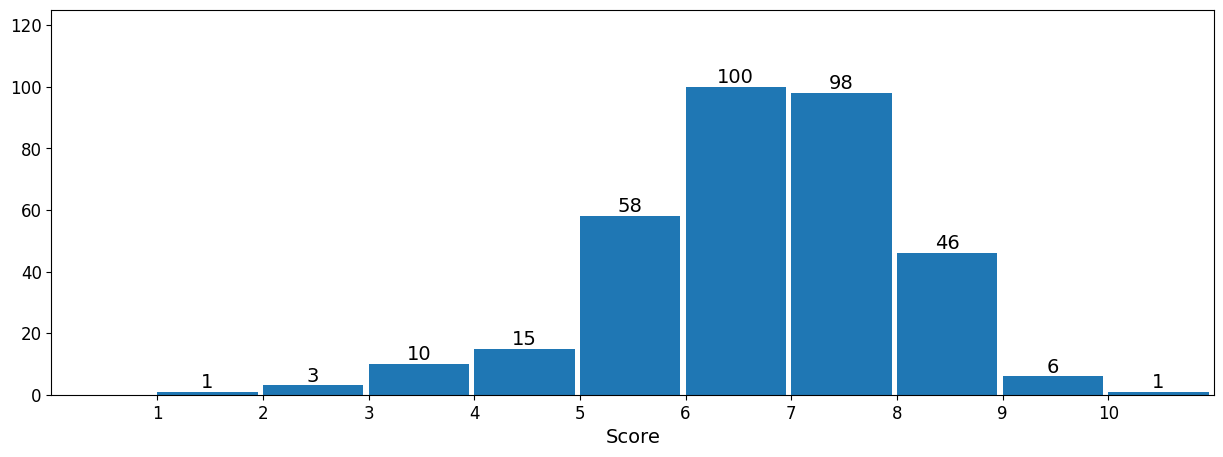

In [128]:
plt.rcParams['figure.figsize'] = [15, 5]

# X/y limits
plt.ylim([0, 125])
plt.xlim([0, 11])

plt.xlabel('Score', fontsize=14)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], fontsize=12)
plt.yticks(fontsize=12, visible=True)


bins_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
counts, bins, patches = plt.hist(scores, bins=bins_list, width=0.95)
plt.bar_label(patches, fontsize=14)
plt.show()

## FFT of year's scores

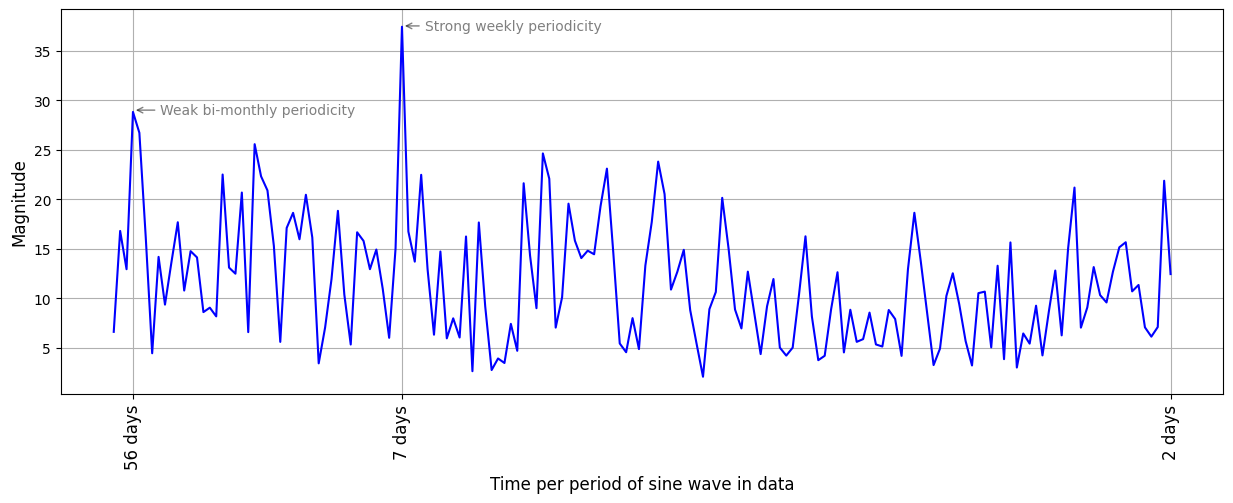

In [131]:
# Hann window
window = numpy.ones(len(scores)) * 0.5 * (1 - numpy.cos((2*numpy.pi*numpy.arange(0, len(scores)))/len(scores)))
power_spectrum = [numpy.absolute(i) for i in numpy.fft.fft((scores - numpy.mean(scores))*window)]
max_frequency = 1./2 # At one sample per day, fastest frequency is 1/2 days
frequencies = numpy.linspace(0, max_frequency, int(len(scores)/2))

fig, ax = plt.subplots(figsize=(15, 5))
ax.grid('true')

ax.annotate('Strong weekly periodicity',
            xy=(45, 37.5), xycoords='data',
            xytext=(80, -5), textcoords='offset points',
            arrowprops=dict(facecolor='black', arrowstyle="->", alpha=0.5),
            horizontalalignment='center', verticalalignment='bottom', alpha=0.5)

ax.annotate('Weak bi-monthly periodicity',
            xy=(3, 29), xycoords='data',
            xytext=(90, -5), textcoords='offset points',
            arrowprops=dict(facecolor='black', arrowstyle="->", alpha=0.5),
            horizontalalignment='center', verticalalignment='bottom', alpha=0.5)

tick_locations = numpy.arange(0, int(len(scores)/2), 1)
# ax.set_xticks(tick_locations[1:], [numpy.round(1./frequencies[i], 2) for i in tick_locations[1:]], rotation='vertical')
ax.set_xticks([3, 45, len(power_spectrum)//2 - 4], ['56 days', '7 days', '2 days'], rotation='vertical')
plt.xticks(fontsize=12)
plt.xlabel('Time per period of sine wave in data', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
# plt.title('Fast Fourier Transform of data')
plt.plot(power_spectrum[3:int(len(power_spectrum)/2)], 'b-')
plt.savefig('2025_power_spectrum.png', bbox_inches = 'tight')
plt.show()

***

# Some things I've learned for 2026

Some of this stuff is probably obvious, but it's helpful that these conclusions are no longer abstract!

- **A lecture that I feel good about does not make my day better, a lecture that I feel poorly about makes it worse.**
> - (As always) the top professional priority should be delivering excellent lectures.
- **Spending time doing *any* engineering makes my day better.**
> - Calendar some time each day to work on *anything*. Even 20-30 minutes helps a lot.
- **More time with family always leads to a better day.**
> - (As always) family time is non-negotiable
- **Stress at home makes for a bad day, no matter how good it may have been professionally.**
> - Always minimize home stressors, even if doing so temporarily increases professional stressors.
- **The opportunity to talk with colleagues/friends makes my day better.**
> - Don't leave this to chance! Schedule lunch with these folks on a semi-regular basis.
- **Reading before bed makes my day better.**
> - Do this, even if you're tired.
- **Some exercise helps a lot.**
> - Exercise, dummy.

***